In [1]:
from cobra.io import load_model, load_json_model 

In [14]:
# Plotting functions to be used across notebooks
%run Plotting_MOBO.ipynb

# same but for .py version
#from Plotting_MOBO import *

In [26]:
# Functions performing the actual optimisation
%run Media-Opt_MOBO.ipynb

# same but for .py version
#from Media-Opt_MOBO import *

# iJO1366 producing antiEpEX_scFv (*E.coli*)

In [4]:
# Model
model_iJO1366_antiEpEX_scFv = load_json_model("..//Models//iJO1366_producing_antiEpEX-scFv.json")
print(model_iJO1366_antiEpEX_scFv)
medium_iJO1366_antiEpEX_scFv = model_iJO1366_antiEpEX_scFv.medium
print(model_iJO1366_antiEpEX_scFv.medium)
print(model_iJO1366_antiEpEX_scFv.slim_optimize())

iJO1366_producing_antiEpEX-scFv
{'EX_ca2_e': 1000.0, 'EX_cbl1_e': 0.01, 'EX_cl_e': 1000.0, 'EX_co2_e': 1000.0, 'EX_cobalt2_e': 1000.0, 'EX_cu2_e': 1000.0, 'EX_fe2_e': 1000.0, 'EX_fe3_e': 1000.0, 'EX_glc__D_e': 10.0, 'EX_h_e': 1000.0, 'EX_h2o_e': 1000.0, 'EX_k_e': 1000.0, 'EX_mg2_e': 1000.0, 'EX_mn2_e': 1000.0, 'EX_mobd_e': 1000.0, 'EX_na1_e': 1000.0, 'EX_nh4_e': 1000.0, 'EX_ni2_e': 1000.0, 'EX_o2_e': 1000.0, 'EX_pi_e': 1000.0, 'EX_sel_e': 1000.0, 'EX_slnt_e': 1000.0, 'EX_so4_e': 1000.0, 'EX_tungs_e': 1000.0, 'EX_zn2_e': 1000.0}
0.9654484045004752


#### exchange, demand, and sink reactions
All of them are unbalanced pseudo reactions, that means they fulfill a function for modeling by adding to or removing metabolites from the model system but are not based on real biology.
* An exchange reaction is a reversible reaction that adds to or removes an extracellular metabolite from the extracellular compartment
* A demand reaction is an irreversible reaction that consumes an intracellular metabolite
* A sink is similar to an exchange but specifically for intracellular metabolites, i.e., a reversible reaction that adds or removes an intracellular metabolite.

In [5]:
# contains plasmid, ampicilin, scFVaa
model_iJO1366_antiEpEX_scFv.demands
"""
[<Reaction DM_4crsol_c at 0x1b28593d130>,
 <Reaction DM_5drib_c at 0x1b28435ce60>,
 <Reaction DM_aacald_c at 0x1b28593d250>,
 <Reaction DM_amob_c at 0x1b28593d2b0>,
 <Reaction DM_mththf_c at 0x1b28593d370>,
 <Reaction DM_oxam_c at 0x1b28593d430>,
 <Reaction DM_scFvAA_c at 0x1b286a0a510>,
 <Reaction DM_ampicilin_c at 0x1b286a0aba0>,
 <Reaction DM_plasmid_c at 0x1b286a0a720>]
"""

'\n[<Reaction DM_4crsol_c at 0x1b28593d130>,\n <Reaction DM_5drib_c at 0x1b28435ce60>,\n <Reaction DM_aacald_c at 0x1b28593d250>,\n <Reaction DM_amob_c at 0x1b28593d2b0>,\n <Reaction DM_mththf_c at 0x1b28593d370>,\n <Reaction DM_oxam_c at 0x1b28593d430>,\n <Reaction DM_scFvAA_c at 0x1b286a0a510>,\n <Reaction DM_ampicilin_c at 0x1b286a0aba0>,\n <Reaction DM_plasmid_c at 0x1b286a0a720>]\n'

In [ ]:
model_iJO1366_antiEpEX_scFv.exchanges

In [7]:
"""MEDIUM"""

# true M9
M9_medium = {
    'EX_nh4_e': 9.3475, # Ammonia
    'EX_ca2_e': 0.05, # Calcium
    'EX_glc__D_e': 10, # Carbon - Glucose
    'EX_cl_e': 13.6755, # Chloride - sum of NaCl, NH4Cl and CaCl2
    'EX_mg2_e': 1, # Magnesium
    'EX_pi_e': 34.90, # Phosphate - sum of KH2PO4 and Na2HPO4
    'EX_k_e': 11.02, # Potassium
    'EX_na1_e': 0, #52.038, # Sodium - sum of NaCl and Na2HPO4
    'EX_so4_e': 1, # Sulfate
    'EX_co2_e': 0.0, # Carbon Dioxide - provided by the "atmosphere"
    'EX_h_e': 0.0, # Hydrogen (from CO2 dissolving in water?)
    'EX_h2o_e': 0.0, # Water - solvent
    'EX_o2_e': 20.0, # Oxygen - provided by the "atmosphere"
}
bounds_M9 = {
    'EX_nh4_e': (0.0, 10),
    'EX_ca2_e': (0.0, 10),
    'EX_glc__D_e': (1.0, 10),
    'EX_cl_e': (0.0, 20),
    'EX_mg2_e': (0.0, 10),
    'EX_pi_e': (0.0, 50),
    'EX_k_e': (0.0, 20),
    #'EX_na1_e': (0.0, 0.0), # fix - can be set to 0
    'EX_so4_e': (0.0, 10),
    #'EX_co2_e': (0.0, 0.0), # 
    #'EX_h2_e': (0.0, 0.0), # 
    #'EX_h2o_e': (0.0, 0.0), # 
    'EX_o2_e': (0, 20), # fix - can't be set to 10 or lower
}
costs_M9 = {
    'EX_nh4_e': 10.099587, # Ammonia - as NH4Cl - approximate (several sources and "side-effect"
    'EX_ca2_e': 18.08223, # Calcium - as CaCl2·2H2O
    'EX_glc__D_e': 7.7647236, # Glucose
    'EX_cl_e': 3.03888, # Chlorid - as NaCl, NH4Cl, CaCl2 - approximate price from NaCl
    'EX_mg2_e': 19.1022, # Magnesium - as MgSO4·7H2O - approximate bc. half of 38.2044
    'EX_pi_e': 23.4234, # Phosphate - approximate (several sources)
    'EX_k_e': 20.82177, # Potassium - as KCl - approximate (several sources and "side-effect"
    #'EX_na1_e': 0.0, # Sodium - as NaCl, Na2HPO4
    'EX_so4_e': 19.1022, # Sulfate - as MgSO4·7H2O - approximate bc. half of 38.2044
    'EX_o2_e': 0.0, # oxygen - no costs    
}

# M9 with essential trace metals
iML1515_reduced_medium = {
    'EX_pi_e': 34.90, # in M9
    'EX_mn2_e': 0.001, # - required?; drops at 0.0001
    'EX_fe2_e': 0.1, # - required?; drops at 0.01
    'EX_glc__D_e': 10.0, # in M9
    'EX_zn2_e': 0.001, # - required?; drops at 0.0001
    'EX_mg2_e': 1.0, # in M9 
    'EX_ca2_e': 0.05, # in M9
    'EX_ni2_e': 0.001, # - required?; drops at 0.0001
    'EX_cu2_e': 0.001, # - required?; drops at 0.0001
    'EX_cobalt2_e': 0.0001, # - required; drops at 0.00001 
    'EX_mobd_e': 0.0005, # - required?; drops at 0.000001
    'EX_so4_e': 1.0, # in M9
    'EX_nh4_e': 9.3475, # in M9
    'EX_k_e': 11.02, # in M9
    #'EX_na1_e': 52.038, # in M9
    'EX_cl_e': 13.6755, # in M9
    'EX_o2_e': 20.0, # in M9 II - drops at 10
}
bounds_iML1515_reduced = {
    'EX_pi_e': (0.0, 50),
    'EX_mn2_e': (0.001, 0.001), # fix "trace" 
    'EX_fe2_e': (0.1, 0.1), # fix "trace"
    'EX_glc__D_e': (1.0, 10),
    'EX_zn2_e': (0.001, 0.001), # fix "trace"
    'EX_mg2_e': (0.0, 10),
    'EX_ca2_e': (0.0, 10),
    'EX_ni2_e': (0.001, 0.001), # fix "trace"
    'EX_cu2_e': (0.001, 0.001), # fix "trace"
    'EX_cobalt2_e': (0.0001, 0.0001), # fix "trace"
    'EX_mobd_e': (0.0005, 0.0005), # fix "trace"
    'EX_so4_e': (0.0, 10),
    'EX_nh4_e': (0.0, 10),
    'EX_k_e': (0.0, 20),
    #'EX_na1_e': (0.0, 0.0), # fix - can be set to 0
    'EX_cl_e': (0.0, 20),
    'EX_o2_e': (0, 20), # fix - can't be set to 10 or lower
}
bounds_iML1515_uni = {
    'EX_pi_e': (1.0, 1.0),
    'EX_mn2_e': (0.001, 0.001), # fix "trace" 
    'EX_fe2_e': (0.1, 0.1), # fix "trace"
    'EX_glc__D_e': (1.0, 10),
    'EX_zn2_e': (0.001, 0.001), # fix "trace"
    'EX_mg2_e': (10, 10),
    'EX_ca2_e': (10, 10),
    'EX_ni2_e': (0.001, 0.001), # fix "trace"
    'EX_cu2_e': (0.001, 0.001), # fix "trace"
    'EX_cobalt2_e': (0.0001, 0.0001), # fix "trace"
    'EX_mobd_e': (0.00001, 0.00001), # fix "trace"
    'EX_so4_e': (10, 10),
    'EX_nh4_e': (3.0, 3.0),
    'EX_k_e': (20, 20),
    #'EX_na1_e': (0.0, 0.0), # fix - can be set to 0
    'EX_cl_e': (20, 20),
    'EX_o2_e': (20, 20), # fix - can't be set to 10 or lower
}
costs_iML1515_reduced = {
    'EX_pi_e': 23.4234, # Phosphate - approximate (several sources)
    'EX_mn2_e': 0.0, #33.25, # Manganese - MnCl2·4H20
    'EX_fe2_e': 0.0, #37.5, # IronII - as iron sulfate FeSO4·7H2O
    'EX_glc__D_e': 7.7647236, # Glucose
    'EX_zn2_e': 0.0, #28.3, # Zinc - as Zn(CH3CHOOH)·H2O
    'EX_mg2_e': 19.1022, # Magnesium - as MgSO4·7H2O - approximate bc. half of 38.2044
    'EX_ca2_e': 18.08223, # Calcium - as CaCl2·2H2O
    'EX_ni2_e': 0.0, #53.24, # Nickel - as NiCl2·6H2O
    'EX_cu2_e': 0.0, #31.37, # Copper - CuCl2·2H2O
    'EX_cobalt2_e': 0.0, #114.39, # Cobalt - as CoCl2·6H2O
    'EX_mobd_e': 0.0, #184.12, # Molybdenum - molybdate NaMoO4·2H2O
    'EX_so4_e': 19.1022, # Sulfate - as MgSO4·7H2O - approximate bc. half of 38.2044
    'EX_nh4_e': 10.099587, # Ammonia - as NH4Cl - approximate (several sources and "side-effect"
    'EX_k_e': 20.82177, # Potassium - as KCl - approximate (several sources and "side-effect"
    #'EX_na1_e': 0.0, # Sodium - as NaCl, Na2HPO4
    'EX_cl_e': 3.03888, # Chlorid - as NaCl, NH4Cl, CaCl2 - approximate price from NaCl
    'EX_o2_e': 0.0, # oxygen - no costs
}

# M9 with essential trace metals and amino acids
iJO1366_enriched_medium = {
    'EX_pi_e': 34.90, # in M9
    'EX_mn2_e': 0.001, # - required?; drops at 0.0001
    'EX_fe2_e': 0.1, # - required?; drops at 0.01
    'EX_glc__D_e': 10.0, # in M9
    'EX_zn2_e': 0.001, # - required?; drops at 0.0001
    'EX_mg2_e': 1.0, # in M9 
    'EX_ca2_e': 0.05, # in M9
    'EX_ni2_e': 0.001, # - required?; drops at 0.0001
    'EX_cu2_e': 0.001, # - required?; drops at 0.0001
    'EX_cobalt2_e': 0.0001, # - required; drops at 0.00001 
    'EX_mobd_e': 0.0005, # - required?; drops at 0.0001 - higher than for iML1515
    'EX_so4_e': 1.0, # in M9
    'EX_nh4_e': 9.3475, # in M9 # lower than with 10
    'EX_k_e': 11.02, # in M9
    'EX_na1_e': 52.038, # in M9
    'EX_cl_e': 13.6755, # in M9
    'EX_o2_e': 20.0, # in M9 II - drops at 10
    'EX_arg__L_e': 0.1, # L-Arginine
    'EX_asn__L_e': 0.1, # L-Asparagine
    'EX_gln__L_e' : 0.1 # L-Glutamine
}
bounds_iJO1366_enriched = {
    'EX_pi_e': (0.0, 50),
    'EX_mn2_e': (0.001, 0.001), # fix "trace" 
    'EX_fe2_e': (0.1, 0.1), # fix "trace"
    'EX_glc__D_e': (1.0, 10),
    'EX_zn2_e': (0.001, 0.001), # fix "trace"
    'EX_mg2_e': (0.0, 10),
    'EX_ca2_e': (0.0, 10),
    'EX_ni2_e': (0.001, 0.001), # fix "trace"
    'EX_cu2_e': (0.001, 0.001), # fix "trace"
    'EX_cobalt2_e': (0.0001, 0.0001), # fix "trace"
    'EX_mobd_e': (0.0005, 0.0005), # fix "trace"
    'EX_so4_e': (0.0, 10),
    'EX_nh4_e': (0.0, 10),
    'EX_k_e': (0.0, 20),
    'EX_na1_e': (0.0, 100.0), # fix - can be set to 0
    'EX_cl_e': (0.0, 20),
    'EX_o2_e': (0, 20), # fix - can't be set to 10 or lower
    'EX_arg__L_e': (0.0, 3.0), # L-Arginine
    'EX_asn__L_e': (0.0, 3.0), # L-Asparagine
    'EX_gln__L_e' : (0.0, 3.0) # L-Glutamine
}
costs_iJO1366_enriched = {
    'EX_pi_e': 23.4234, # Phosphate - approximate (several sources)
    'EX_mn2_e': 0.0, #33.25, # Manganese - MnCl2·4H20
    'EX_fe2_e': 0.0, #37.5, # IronII - as iron sulfate FeSO4·7H2O
    'EX_glc__D_e': 7.7647236, # Glucose
    'EX_zn2_e': 0.0, #28.3, # Zinc - as Zn(CH3CHOOH)·H2O
    'EX_mg2_e': 19.1022, # Magnesium - as MgSO4·7H2O - approximate bc. half of 38.2044
    'EX_ca2_e': 18.08223, # Calcium - as CaCl2·2H2O
    'EX_ni2_e': 0.0, #53.24, # Nickel - as NiCl2·6H2O
    'EX_cu2_e': 0.0, #31.37, # Copper - CuCl2·2H2O
    'EX_cobalt2_e': 0.0, #114.39, # Cobalt - as CoCl2·6H2O
    'EX_mobd_e': 0.0, #184.12, # Molybdenum - molybdate NaMoO4·2H2O
    'EX_so4_e': 19.1022, # Sulfate - as MgSO4·7H2O - approximate bc. half of 38.2044
    'EX_nh4_e': 10.099587, # Ammonia - as NH4Cl - approximate (several sources and "side-effect"
    'EX_k_e': 20.82177, # Potassium - as KCl - approximate (several sources and "side-effect"
    'EX_na1_e': 0.0, # Sodium - as NaCl, Na2HPO4
    'EX_cl_e': 3.03888, # Chlorid - as NaCl, NH4Cl, CaCl2 - approximate price from NaCl
    'EX_o2_e': 0.0, # oxygen - no costs
    'EX_arg__L_e': 61.1442, # L-Arginine
    'EX_asn__L_e': 93.01248, # L-Asparagine
    'EX_gln__L_e' : 80.23086 # L-Glutamine
}


In [8]:
biomass_rxn_id = "BIOMASS_Ec_iJO1366_core_53p95M"
protein_rxn_id = "Recombinant_protein"

model_iJO1366_antiEpEX_scFv.objective_direction = 'max'
print("Objective:\n", model_iJO1366_antiEpEX_scFv.objective)

model_iJO1366_antiEpEX_scFv.medium = medium_iJO1366_antiEpEX_scFv
solution = model_iJO1366_antiEpEX_scFv.optimize()
print("\nmedium_iJO1366:\n", 
      "Growth:\t", solution.fluxes[biomass_rxn_id], "\n",
      "Protein:\t", solution.fluxes[protein_rxn_id])

model_iJO1366_antiEpEX_scFv.medium = iJO1366_enriched_medium
solution = model_iJO1366_antiEpEX_scFv.optimize()
print("\niJO1366_enriched_medium:\n", 
      "Growth:\t", solution.fluxes[biomass_rxn_id], "\n",
      "Protein:\t", solution.fluxes[protein_rxn_id])

model_iJO1366_antiEpEX_scFv.medium = iML1515_reduced_medium
solution = model_iJO1366_antiEpEX_scFv.optimize()
print("\niML1515_reduced_medium:\n", 
      "Growth:\t", solution.fluxes[biomass_rxn_id], "\n",
      "Protein:\t", solution.fluxes[protein_rxn_id])

model_iJO1366_antiEpEX_scFv.medium = M9_medium
solution = model_iJO1366_antiEpEX_scFv.optimize()
print("\nM9_medium:\n", 
      "Growth:\t", solution.fluxes[biomass_rxn_id], "\n",
      "Protein:\t", solution.fluxes[protein_rxn_id])

Objective:
 Maximize
1.0*BIOMASS_Ec_iJO1366_core_53p95M - 1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1

medium_iJO1366:
 Growth:	 0.9654484045004766 
 Protein:	 0.0

iJO1366_enriched_medium:
 Growth:	 0.9190186785748784 
 Protein:	 0.0

iML1515_reduced_medium:
 Growth:	 0.8449502556471445 
 Protein:	 0.0

M9_medium:
 Growth:	 -1.1621333506053623e-16 
 Protein:	 0.00950905561447737


# Call

In [10]:
date = "2024-11-08"
AF_type = 'qPAREGO'
objective = "growth-cost"
n_iter = 10 # how many media compositions to evaluate; saw convergence after about 40
iterations = str(n_iter)
round = 1
runde = str(round)
basename = date + "_BayesOpt_iJO1366_antiEpEX_scFv_" + AF_type + objective + "_" + iterations + "it_round" + runde
filename = basename + ".json"
print(filename)

2024-11-08_BayesOpt_iJO1366_antiEpEX_scFv_qPAREGOgrowth-cost_10it_round1.json


('growth-cost', 'growth-production', 'growth-production-cost')


Running iJO1366 antiEpEX_scFv model with objective  growth-cost  using AF  qNEHVI
Round:	 1 of  1


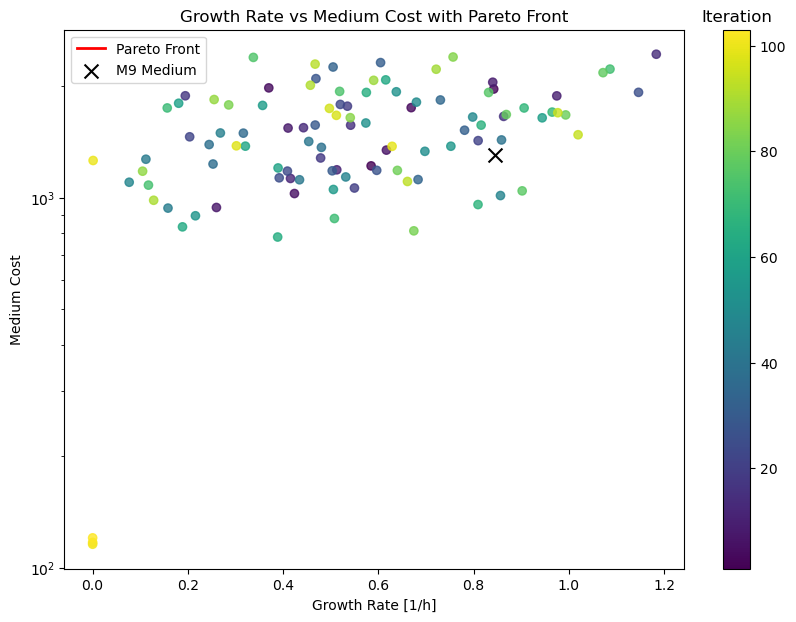

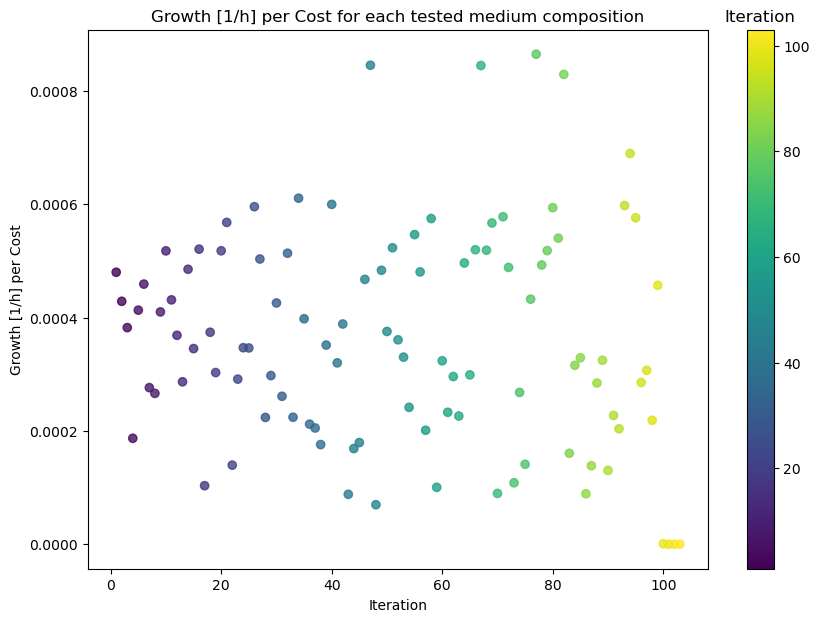



Running iJO1366 antiEpEX_scFv model with objective  growth-production  using AF  qNEHVI
Round:	 1 of  1


c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\botorch\models\utils\assorted.py:268: InputDataWarning: Data (outcome observations) is not standardized (std = tensor([0.], dtype=torch.float64), mean = tensor([0.], dtype=torch.float64)).Please consider scaling the input to zero mean and unit variance.
  check_standardization(Y=train_Y, raise_on_fail=raise_on_fail)


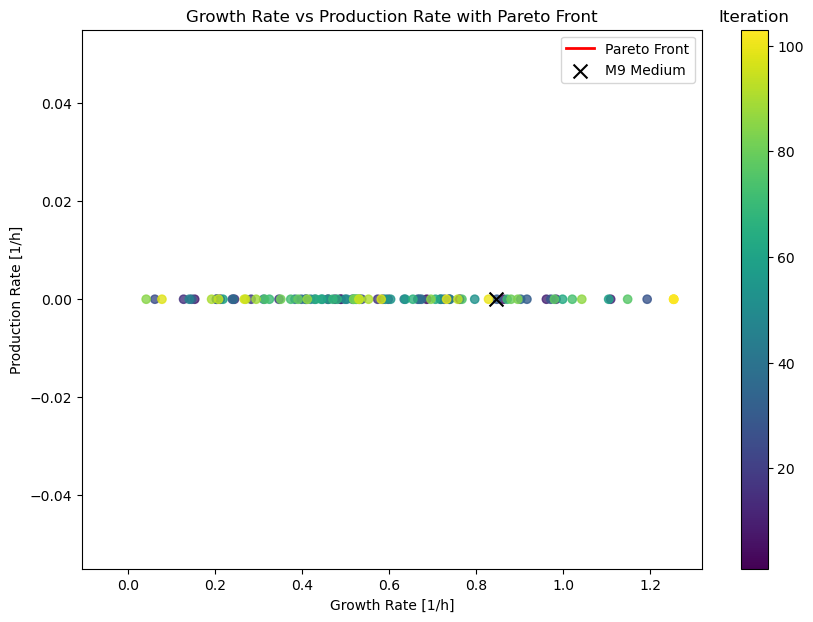



Running iJO1366 antiEpEX_scFv model with objective  growth-production-cost  using AF  qNEHVI
Round:	 1 of  1


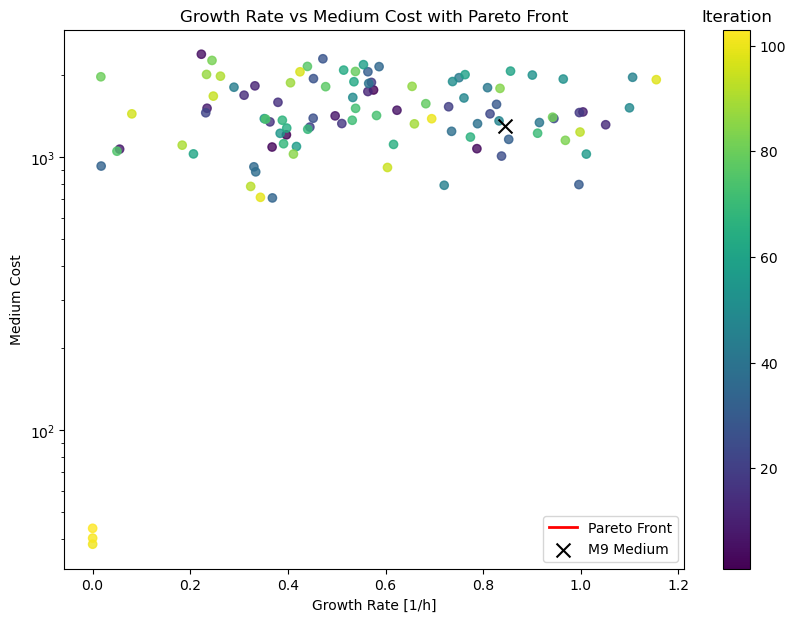

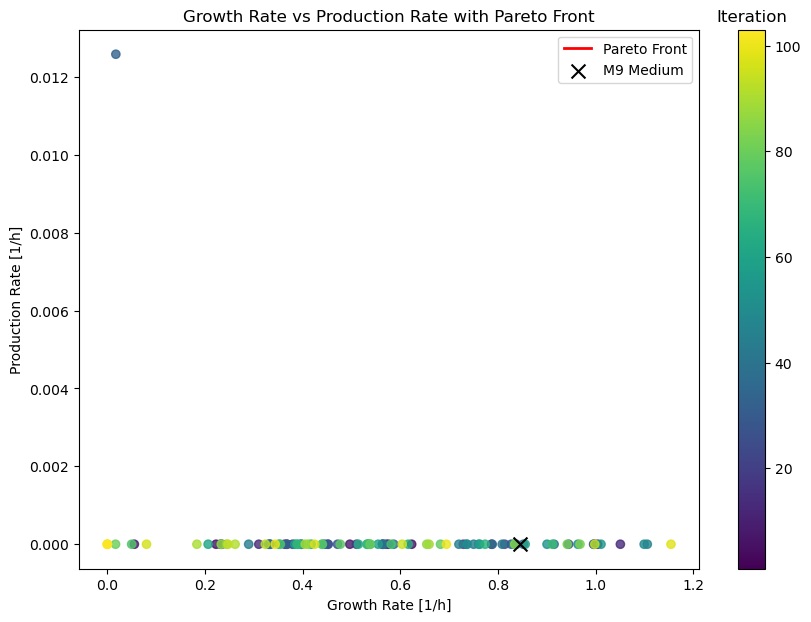

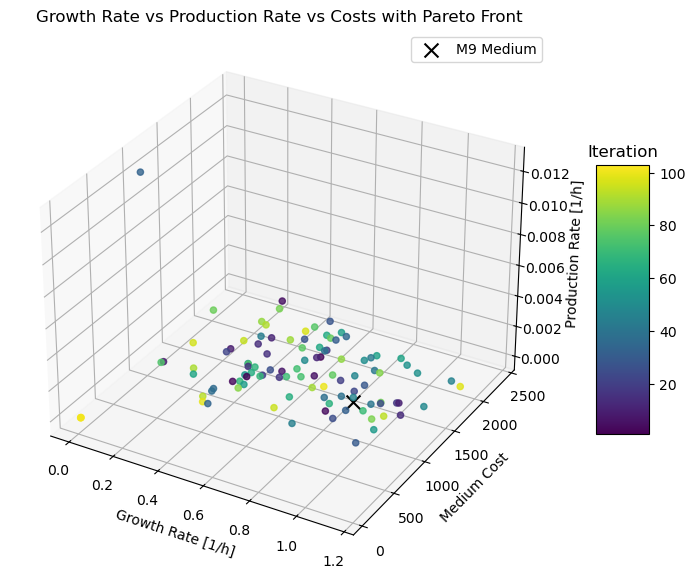

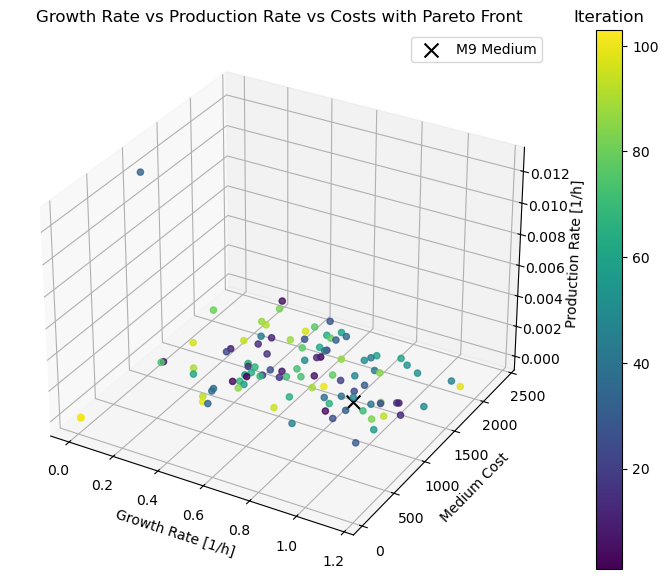

In [112]:
'''iJO1366'''
# set n_iter and date to be used in all calls and names
date = "2024-11-07"
rounds = 1 # how often should the algorithm run
n_start = 100 # how many random media compositions to initialise the algorithm
n_iter = 1 # how many media compositions to evaluate; saw convergence after about 40
iterations = str(n_iter)
n_candidates = 3 # how many candidate mediums should be found per iterations
objectives = ("growth-cost", "growth-production", "growth-production-cost")
#objectives = ("growth-production", "growth-production-cost")
#objectives = ("growth-cost", "growth")
#objectives = ("growth-production-cost", "growth")
print(objectives)

AF_types = ('qPAREGO', 'qEHVI', 'qNEHVI')
AF_type = 'qPAREGO'
AF_type = 'qEHVI' # runs for ages; not sure why
AF_type = 'qNEHVI' # "optimises" growth rate to zero

medium = iJO1366_enriched_medium
bounds = bounds_iJO1366_enriched
costs = costs_iJO1366_enriched
MetModel = model_iJO1366_antiEpEX_scFv

for objective in objectives:
    biomass_rxn_id = "BIOMASS_Ec_iJO1366_core_53p95M"
    protein_rxn_id = "Recombinant_protein"
    print("\n\nRunning iJO1366 antiEpEX_scFv model with objective ", objective, " using AF ", AF_type)
    if objective == "growth-cost":
            protein_rxn_id = None

    for r in range(rounds):
        print("Round:\t", r+1, "of ", rounds)
            
        results_iJO = media_BayesOpt(
            MetModel, 
            medium = medium, 
            bounds = bounds, 
            costs = costs,
            opt_objective = objective,
            biomass_objective = biomass_rxn_id,
            production_objective = protein_rxn_id,
            n_start = n_start,
            n_iter = n_iter,
            n_candidates = n_candidates,
            AF_type = AF_type
            )


        # Convert the tensors to lists for JSON serialisation
        results_json_comp = copy.deepcopy(results_iJO) # make deep copy so that results stays unaffected
        results_json_comp["growth rate tensors"] = results_json_comp["growth rate tensors"].tolist()
        results_json_comp["growth rate list"] = results_json_comp.pop("growth rate tensors") # change name of dictionary key
        results_json_comp["cost tensors"] = results_json_comp["cost tensors"].tolist()
        results_json_comp["cost list"] = results_json_comp.pop("cost tensors") # change name of dictionary key
        results_json_comp["production tensors"] = results_json_comp["production tensors"].tolist()
        results_json_comp["production list"] = results_json_comp.pop("production tensors") # change name of dictionary key
        results_json_comp["is pareto"] = results_json_comp["is pareto"].tolist()
        
        # convert into json and save as file
        runde = str(r+1)
        basename = date + "_BayesOpt_iJO1366_antiEpEX_scFv_" + AF_type + objective + "_" + iterations + "it_round" + runde
        filename = basename + ".json"
        with open(filename, 'w') as f: 
            json.dump(results_json_comp, f, indent=2) # indent for readability
        
        # Delete the results_json_comp to free up memory
        del results_json_comp
        
        # plot
        if objective == "growth-cost":
            plot_pareto(results_iJO, xax = "growth rate tensors", yax = "cost tensors", 
                        figname = (basename + "_pareto.png"),
                        MetModel = MetModel, M9_medium = iML1515_reduced_medium, M9_costs = costs_iML1515_reduced)
            plot_growth_per_cost(results_iJO, (basename + "_growthcost.png"))
        
        elif objective == "growth-production":
            plot_pareto(results_iJO, xax = "growth rate tensors", yax = "production tensors",
                        figname = (basename + "_pareto.png"),
                        MetModel = MetModel, M9_medium = iML1515_reduced_medium, M9_costs = costs_iML1515_reduced)
            
        elif objective == "growth-production-cost":
            plot_pareto(results_iJO, xax = "growth rate tensors", yax = "cost tensors",
                        figname = (basename + "_pareto_growth-cost.png"),
                        MetModel = MetModel, M9_medium = iML1515_reduced_medium, M9_costs = costs_iML1515_reduced)
            
            plot_pareto(results_iJO, xax = "growth rate tensors", yax = "production tensors",
                        figname = (basename + "_pareto_growth-production.png"),
                        MetModel = MetModel, M9_medium = iML1515_reduced_medium, M9_costs = costs_iML1515_reduced)

            plot_pareto_3D(results_iJO, xax = "growth rate tensors", yax = "cost tensors", zax = "production tensors",
                           figname = (basename + "_pareto3D.png"),
                           MetModel = MetModel, M9_medium = iML1515_reduced_medium, M9_costs = costs_iML1515_reduced)
            plot_3D(results_iJO, xax = "growth rate tensors", yax = "cost tensors", zax = "production tensors",
                    figname = (basename + "_pareto3D_2.png"),
                    MetModel = MetModel, M9_medium = iML1515_reduced_medium, M9_costs = costs_iML1515_reduced)
    

# Run it with iML1515 to see how it behaves

In [11]:
model_iML1515 = load_model("iML1515")

In [12]:
print(model_iML1515.objective)

Maximize
1.0*BIOMASS_Ec_iML1515_core_75p37M - 1.0*BIOMASS_Ec_iML1515_core_75p37M_reverse_35685



INITIAL:

Growth:
tensor([0.4478, 0.3768, 0.5126, 0.4103, 0.1748, 0.2031, 0.1050, 0.1324, 0.3498,
        0.4563, 0.1713, 0.1365, 0.0028, 0.0450, 0.5413, 0.0944, 0.5206, 0.1891,
        0.2584, 0.1237, 0.1231, 0.0138, 0.1816, 0.2311, 0.1835, 0.0945, 0.6247,
        0.1587, 0.1175, 0.0822, 0.0206, 0.4185, 0.0715, 0.2843, 0.3633, 0.2062,
        0.0890, 0.2050, 0.0724, 0.4208, 0.2166, 0.0596, 0.6344, 0.1067, 0.1333,
        0.1294, 0.3495, 0.2535, 0.2218, 0.3721], dtype=torch.float64)
tensor([0.7045, 0.5922, 0.8072, 0.6452, 0.2723, 0.3172, 0.1618, 0.2052, 0.5495,
        0.7180, 0.2668, 0.2117, 0.0000, 0.0669, 0.8526, 0.1450, 0.8198, 0.2950,
        0.4048, 0.1915, 0.1904, 0.0175, 0.2831, 0.3614, 0.2862, 0.1453, 0.9846,
        0.2469, 0.1816, 0.1258, 0.0282, 0.6581, 0.1088, 0.4457, 0.5708, 0.3221,
        0.1365, 0.3201, 0.1102, 0.6618, 0.3386, 0.0900, 1.0000, 0.1645, 0.2067,
        0.2004, 0.5489, 0.3970, 0.3468, 0.5848], dtype=torch.float64)

Costs:
tensor([-1322.7287, -1866.9751, -

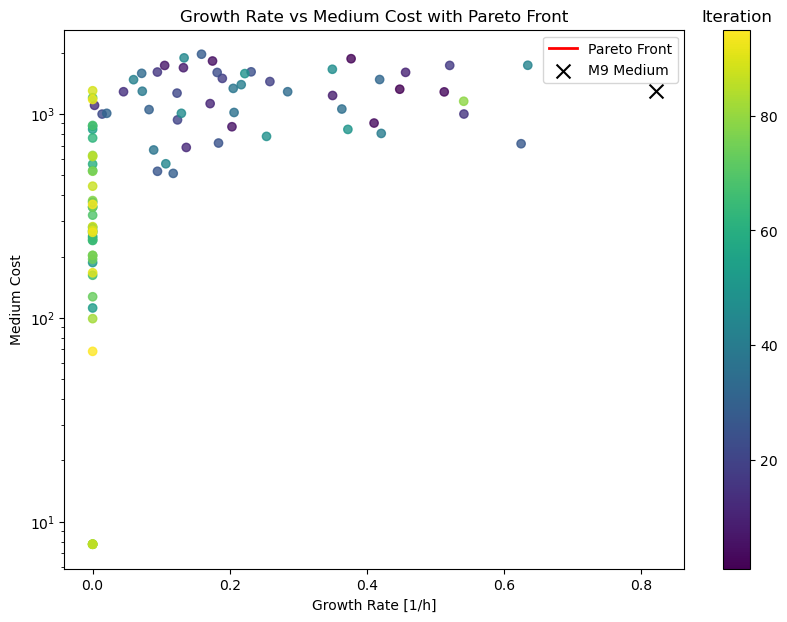

In [ ]:
date = "2024-11-08"
n_start = 50 # how many random media compositions to initialise the algorithm
n_iter = 15 # how many media compositions to evaluate; saw convergence after about 40
n_candidates = 3 # how many candidate mediums should be found per iterations
iterations = str(n_iter)


medium = iML1515_reduced_medium
bounds = bounds_iML1515_reduced
costs = costs_iML1515_reduced
objective = "growth-cost"
biomass_rxn_id = "BIOMASS_Ec_iML1515_core_75p37M"
protein_rxn_id = None
AF_type = "qNEHVI"


results_iML1515 = media_BayesOpt(
    model_iML1515, 
    medium = medium, 
    bounds = bounds, 
    costs = costs,
    opt_objective = objective,
    biomass_objective = biomass_rxn_id,
    production_objective = protein_rxn_id,
    n_start = n_start,
    n_iter = n_iter,
    n_candidates = n_candidates,
    AF_type = AF_type
    )

plot_pareto(
    results_iML1515,
    xax = "growth rate tensors", 
    yax = "cost tensors",
    figname = "figure.png",
    MetModel = model_iML1515,
    M9_medium = iML1515_reduced_medium,
    M9_costs = costs_iML1515_reduced
    )


Grwoth:
tensor([0.5097, 0.4465, 0.5249, 0.3674, 0.5605, 0.1963, 0.4296, 0.1624, 0.4175,
        0.8115], dtype=torch.float64)
tensor([0.5351, 0.4378, 0.5585, 0.3158, 0.6134, 0.0522, 0.4117, 0.0000, 0.3931,
        1.0000], dtype=torch.float64)

Costs:
tensor([-1119.8135, -1419.6156,  -751.9434, -1596.3502, -2017.0489, -2113.8859,
        -2172.9796, -1216.8847, -1552.8929, -1437.7169], dtype=torch.float64)
tensor([-0.2589, -0.4698, -0.0000, -0.5942, -0.8903, -0.9584, -1.0000, -0.3272,
        -0.5636, -0.4826], dtype=torch.float64)

Production
tensor([], dtype=torch.float64)
tensor([])

Grwoth:
tensor([0.5097, 0.4465, 0.5249, 0.3674, 0.5605, 0.1963, 0.4296, 0.1624, 0.4175,
        0.8115, 0.0000], dtype=torch.float64)
tensor([0.6281, 0.5503, 0.6469, 0.4527, 0.6907, 0.2419, 0.5294, 0.2001, 0.5145,
        1.0000, 0.0000], dtype=torch.float64)

Costs:
tensor([-1119.8135, -1419.6156,  -751.9434, -1596.3502, -2017.0489, -2113.8859,
        -2172.9796, -1216.8847, -1552.8929, -1437.7169,  

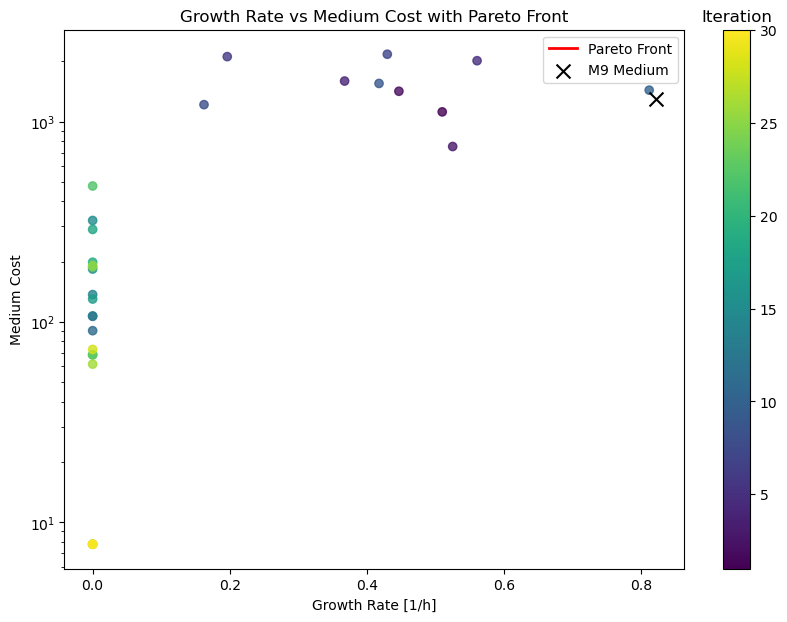

In [ ]:
AF_type = "qEHVI"
objective = "growth-cost"
biomass_rxn_id = "BIOMASS_Ec_iML1515_core_75p37M"
protein_rxn_id = None
# took 46min for 20 iterations with one candidate each and 10 initial points


results_iML1515 = media_BayesOpt(
    model_iML1515, 
    medium = medium, 
    bounds = bounds, 
    costs = costs,
    opt_objective = objective,
    biomass_objective = biomass_rxn_id,
    production_objective = protein_rxn_id,
    n_start = n_start,
    n_iter = n_iter,
    n_candidates = n_candidates,
    AF_type = AF_type
    )

plot_pareto(
    results_iML1515,
    xax = "growth rate tensors", 
    yax = "cost tensors",
    figname = "figure.png",
    MetModel = model_iML1515,
    M9_medium = iML1515_reduced_medium,
    M9_costs = costs_iML1515_reduced
    )


INITIAL:

Growth:
tensor([0.3028, 0.5164, 0.3770, 0.2272, 0.2054, 0.1153, 0.0847, 0.0223, 0.3752,
        0.2477], dtype=torch.float64)
tensor([0.5677, 1.0000, 0.7178, 0.4147, 0.3707, 0.1882, 0.1263, 0.0000, 0.7143,
        0.4563], dtype=torch.float64)

Costs:
tensor([-1860.7413, -1280.7946, -1462.9371, -1080.9263, -1195.4347, -1313.8979,
        -1524.8434, -1304.8284, -1244.1401, -1176.6085], dtype=torch.float64)
tensor([-1.0000, -0.2563, -0.4899, -0.0000, -0.1468, -0.2988, -0.5693, -0.2871,
        -0.2093, -0.1227], dtype=torch.float64)

Production
tensor([], dtype=torch.float64)
tensor([])
INSIDE find_next_candidate

Growth:
tensor([0.5677, 1.0000, 0.7178, 0.4147, 0.3707, 0.1882, 0.1263, 0.0000, 0.7143,
        0.4563], dtype=torch.float64)

Costs:
tensor([-1.0000, -0.2563, -0.4899, -0.0000, -0.1468, -0.2988, -0.5693, -0.2871,
        -0.2093, -0.1227], dtype=torch.float64)

Production
None
Best F:
0.7997223788832836

Weights:
tensor([0.8406, 0.1594], dtype=torch.float64)

Poste

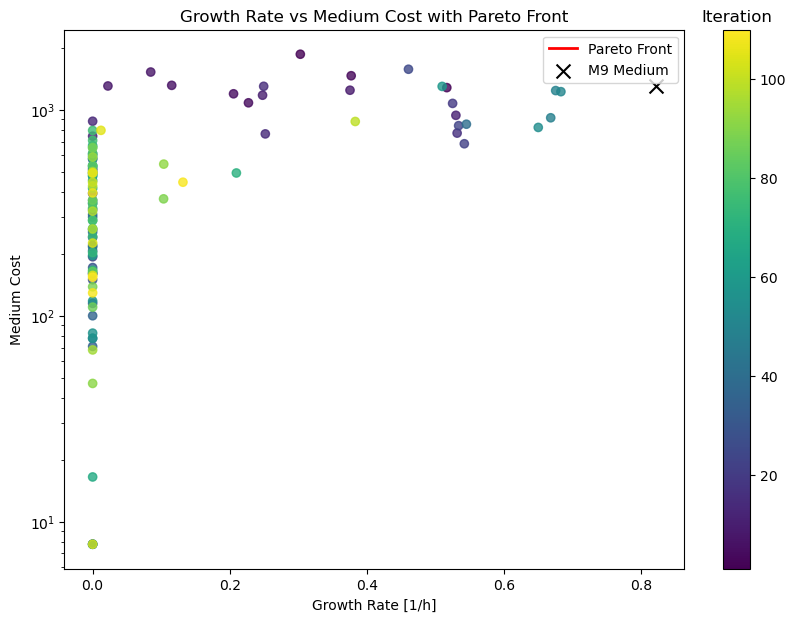

In [24]:
n_start = 10 # how many random media compositions to initialise the algorithm
n_iter = 20 # how many media compositions to evaluate; saw convergence after about 40
n_candidates = 5 # how many candidate mediums should be found per iterations
AF_type = "qPAREGO"
objective = "growth-cost"


results_iML1515 = media_BayesOpt(
    model_iML1515, 
    medium = medium, 
    bounds = bounds, 
    costs = costs,
    opt_objective = objective,
    biomass_objective = biomass_rxn_id,
    production_objective = protein_rxn_id,
    n_start = n_start,
    n_iter = n_iter,
    n_candidates = n_candidates,
    AF_type = AF_type
    )

plot_pareto(
    results_iML1515,
    xax = "growth rate tensors", 
    yax = "cost tensors",
    figname = "figure.png",
    MetModel = model_iML1515,
    M9_medium = iML1515_reduced_medium,
    M9_costs = costs_iML1515_reduced
    )


INITIAL:

Growth:
tensor([0.5141, 0.0865, 0.4380, 0.1887, 0.0630, 0.0393, 0.0977, 0.6668, 0.2572,
        0.5208], dtype=torch.float64)
tensor([0.7567, 0.0751, 0.6353, 0.2381, 0.0377, 0.0000, 0.0931, 1.0000, 0.3472,
        0.7674], dtype=torch.float64)

Costs:
tensor([ -904.4385, -1112.7576,  -768.1922, -1161.5020, -1412.5977, -1678.0042,
         -932.9794,  -854.9186, -1346.3652, -1881.4453], dtype=torch.float64)
tensor([-0.1224, -0.3095, -0.0000, -0.3533, -0.5788, -0.8173, -0.1480, -0.0779,
        -0.5194, -1.0000], dtype=torch.float64)

Production
tensor([], dtype=torch.float64)
tensor([])
Best F:
-541.7441982633981

Weights:
tensor([0.2946, 0.7054], dtype=torch.float64)

Posterior:
tensor([[ 5.1307e-01, -9.0612e+02],
        [ 9.1146e-02, -1.1098e+03],
        [ 4.3489e-01, -7.7645e+02],
        [ 1.9277e-01, -1.1540e+03],
        [ 6.2873e-02, -1.4142e+03],
        [ 4.2014e-02, -1.6753e+03],
        [ 9.7754e-02, -9.3698e+02],
        [ 6.6516e-01, -8.5290e+02],
        [ 2.5

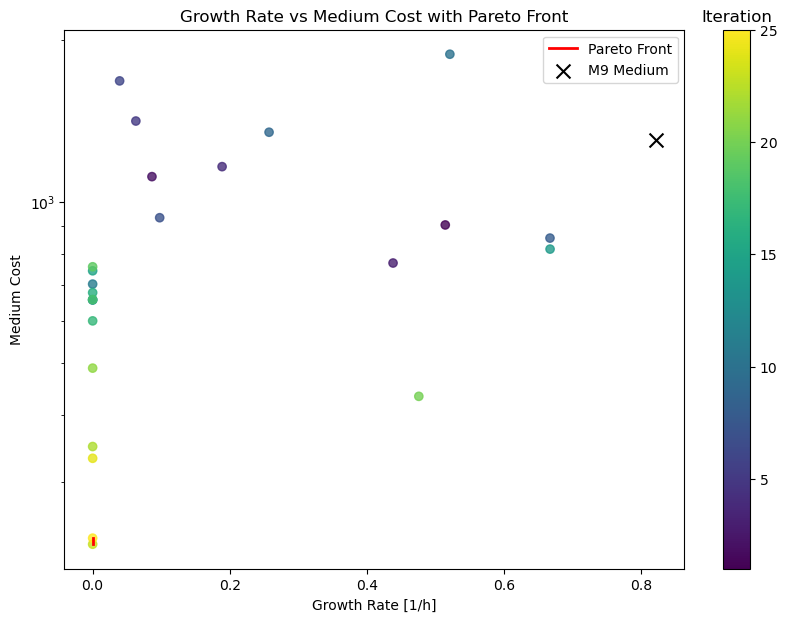

In [19]:
date = "2024-11-08"
n_start = 10 # how many random media compositions to initialise the algorithm
n_iter = 15 # how many media compositions to evaluate; saw convergence after about 40
n_candidates = 1 # how many candidate mediums should be found per iterations
iterations = str(n_iter)


medium = iML1515_reduced_medium
bounds = bounds_iML1515_reduced
costs = costs_iML1515_reduced
objective = "growth-cost"
biomass_rxn_id = "BIOMASS_Ec_iML1515_core_75p37M"
protein_rxn_id = None
AF_type = "qPAREGO"


results_iML1515 = media_BayesOpt(
    model_iML1515, 
    medium = medium, 
    bounds = bounds, 
    costs = costs,
    opt_objective = objective,
    biomass_objective = biomass_rxn_id,
    production_objective = protein_rxn_id,
    n_start = n_start,
    n_iter = n_iter,
    n_candidates = n_candidates,
    AF_type = AF_type
    )

plot_pareto(
    results_iML1515,
    xax = "growth rate tensors", 
    yax = "cost tensors",
    figname = "figure.png",
    MetModel = model_iML1515,
    M9_medium = iML1515_reduced_medium,
    M9_costs = costs_iML1515_reduced
    )